# Analysis of Manipal's Weather

### Aim
The aim of this notebook is to perform exploratory data analysis on Manipal's weather to identify major trends and seasons and also to study the impacts of climate change in Manipal.

### Dataset Description

The provided dataset contained daily weather station records of various meteorological observations including -

 - Temperature
 - Precipitation
 - Solar Radiation
 - Wind Speed
 - Soil Moisture
 - Pressure Indicators

Time Spane: **2011 to 2026**

Location: **Manipal, Karnataka**

Latitude & Longitude: **13.321617**, **74.79452**

Elevation: **97.0 m**

Timzone: **GMT+5:30**

## Data Loading

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

meta = pd.read_csv("/content/drive/MyDrive/manipal_atmospherics_df.csv", nrows=1)
data = pd.read_csv("/content/drive/MyDrive/manipal_atmospherics_df.csv", skiprows=3, parse_dates=['time'])

data.head()

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


,time,temperature_2m_mean (°C),precipitation_sum (mm),shortwave_radiation_sum (MJ/m²),apparent_temperature_mean (°C),wind_speed_10m_max (km/h),et0_fao_evapotranspiration (mm),sunshine_duration (s),wind_direction_10m_dominant (°),pressure_msl_mean (hPa),cloud_cover_mean (%),dew_point_2m_mean (°C),soil_moisture_0_to_7cm_mean (m³/m³)
0,2011-01-04,24.7,0.0,19.69,27.7,17.4,4.09,36798.94,325,1009.7,70,20.4,0.278
1,2011-01-05,25.4,0.0,17.77,28.5,15.9,3.91,36494.80,309,1008.7,85,20.4,0.276
2,2011-01-06,26.2,0.0,19.31,28.8,18.4,4.45,36924.74,319,1008.7,61,19.4,0.273
3,2011-01-07,25.6,0.0,20.26,28.0,15.6,4.52,37417.72,178,1008.6,12,18.6,0.270
4,2011-01-08,25.2,0.0,20.29,28.2,15.1,4.38,37473.21,313,1008.3,29,20.0,0.268


## Basic Data Inspection

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5480 entries, 0 to 5479
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   time                                 5480 non-null   datetime64[ns]
 1   temperature_2m_mean (°C)             5480 non-null   float64       
 2   precipitation_sum (mm)               5480 non-null   float64       
 3   shortwave_radiation_sum (MJ/m²)      5480 non-null   float64       
 4   apparent_temperature_mean (°C)       5480 non-null   float64       
 5   wind_speed_10m_max (km/h)            5480 non-null   float64       
 6   et0_fao_evapotranspiration (mm)      5480 non-null   float64       
 7   sunshine_duration (s)                5480 non-null   float64       
 8   wind_direction_10m_dominant (°)      5480 non-null   int64         
 9   pressure_msl_mean (hPa)              5480 non-null   float64       
 10  cloud_cover_

In [ ]:
data.describe()

,time,temperature_2m_mean (°C),precipitation_sum (mm),shortwave_radiation_sum (MJ/m²),apparent_temperature_mean (°C),wind_speed_10m_max (km/h),et0_fao_evapotranspiration (mm),sunshine_duration (s),wind_direction_10m_dominant (°),pressure_msl_mean (hPa),cloud_cover_mean (%),dew_point_2m_mean (°C),soil_moisture_0_to_7cm_mean (m³/m³)
count,5480,5480.000000,5480.000000,5480.000000,5480.000000,5480.000000,5480.000000,5480.000000,5480.000000,5480.000000,5480.000000,5480.000000,5480.000000
mean,2018-07-05 12:00:00,26.266715,9.319088,18.172217,30.421752,15.881314,3.874894,32432.841095,265.097080,1009.585657,63.644708,22.360255,0.385148
min,2011-01-04 00:00:00,22.700000,0.000000,1.900000,23.700000,5.900000,0.640000,0.000000,0.000000,999.100000,0.000000,10.600000,0.181000
25%,2014-10-04 18:00:00,25.100000,0.000000,15.670000,28.800000,13.500000,3.090000,30436.440000,239.000000,1008.300000,33.000000,21.500000,0.269000
50%,2018-07-05 12:00:00,26.000000,1.100000,19.420000,30.300000,15.700000,4.050000,37166.285000,284.000000,1009.600000,72.000000,23.100000,0.407000
75%,2022-04-05 06:00:00,27.200000,11.600000,21.760000,31.900000,17.925000,4.790000,39066.010000,313.000000,1010.900000,96.000000,23.900000,0.488000
max,2026-01-04 00:00:00,31.100000,169.700000,27.050000,37.000000,40.500000,6.610000,43200.000000,360.000000,1015.600000,100.000000,26.300000,0.516000
std,NaN,1.557200,16.782547,4.956198,2.302532,3.402819,1.203321,11448.653111,68.255966,1.876153,33.339070,2.276768,0.104756


As we can see, the provided data consists of daily records starting from 2011-01-04, and contains no missing or null values.

 - The temperature ranges from 22.7 to 31.1 °C with mean of 26.27 °C

 - The precipitation data suggests short periods of heavy rainfall as the major trend.

## Data Analysis & Graphs

In order to understand the changes better, we'll graph some data.

In [ ]:
data['year'] = data['time'].dt.year
data['month'] = data['time'].dt.month
data['day'] = data['time'].dt.day

### Temperature graph

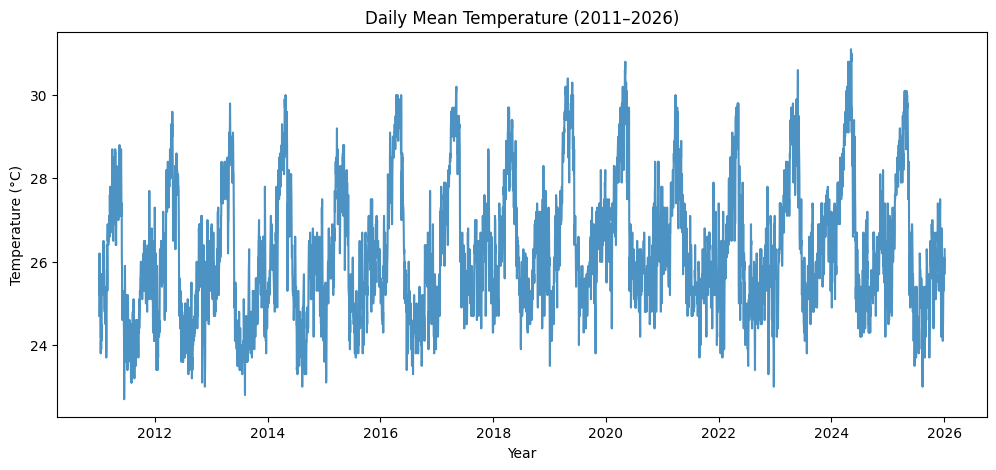

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(data['time'], data['temperature_2m_mean (°C)'], alpha=0.8)
plt.title("Daily Mean Temperature (2011–2026)")
plt.xlabel("Year")
plt.ylabel("Temperature (°C)")
plt.show()

This graph suggests two main seasons based on temperature -
 - Summer involving a gradual rise of temperature
 - Monsoon involving a sharp drop and small window of low temperatures.

### Rainfall Distribution Graph

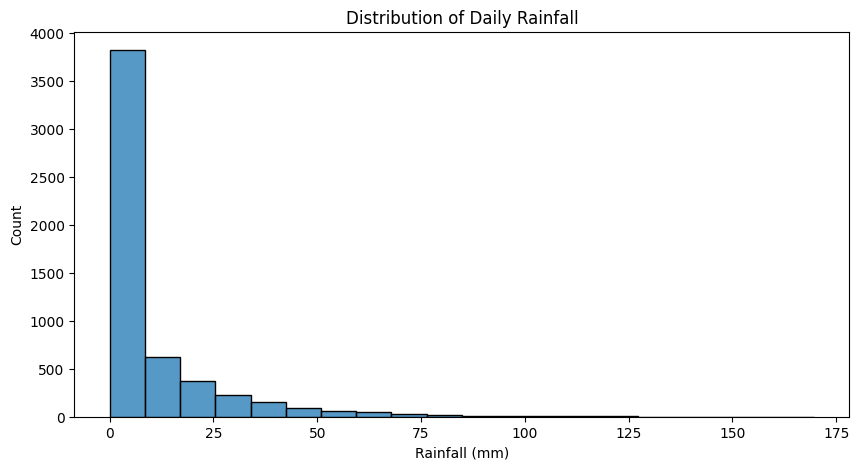

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(data['precipitation_sum (mm)'], bins=20)
plt.title("Distribution of Daily Rainfall")
plt.xlabel("Rainfall (mm)")
plt.show()

As we can see, Manipal, doesn't recieve rainfall on most days, an recieves sparse rainfall for some days and heavy rainfall on relatively few days.

### Correlations Heatmap

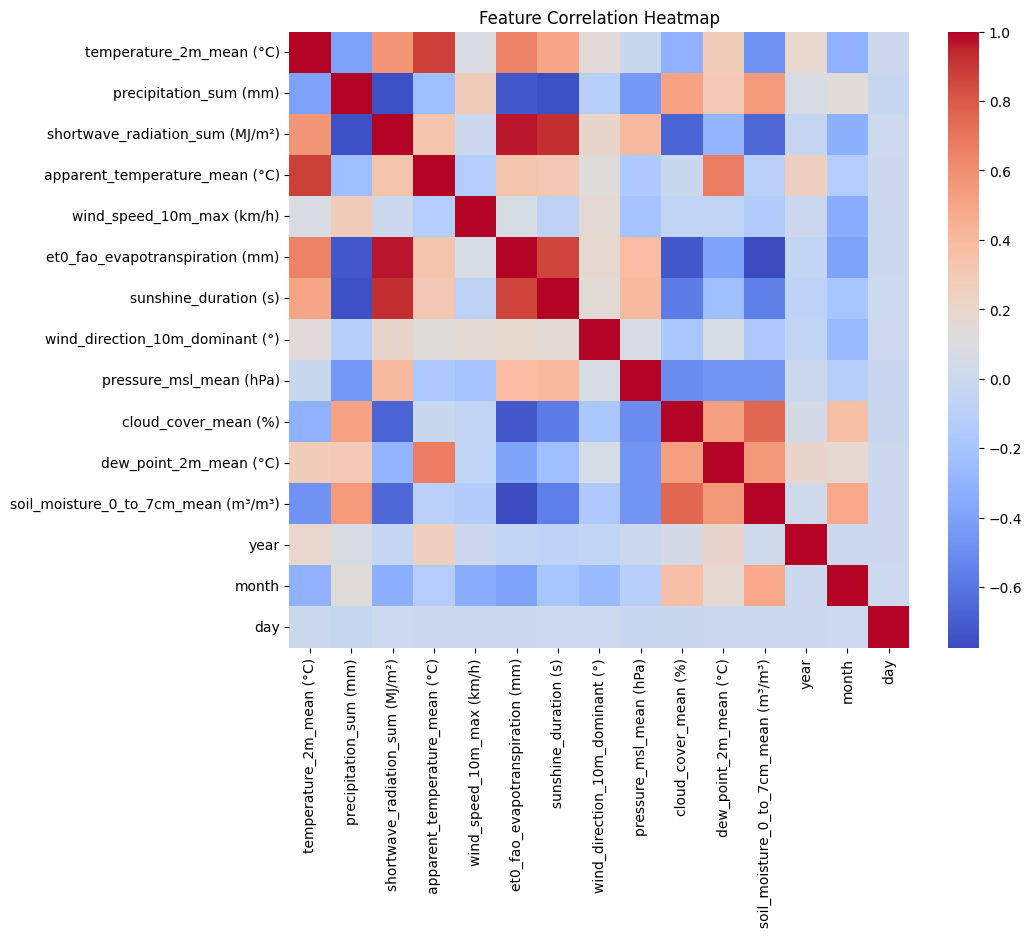

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(numeric_only=True), cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

Based on this we can identify some correlations among data -
 - Soul Moisture, Dew Point and Cloud Cover are highly correlated
 - Evapotranspiration rate, solar raidation and sunshine duration are correlated.

## Climate Change Analysis

Now, we'll use linear regression and Random Forest models to analyse the effect of climate change.

### Temperature Trend

In [ ]:
X = data[['year']]
y = data['temperature_2m_mean (°C)']

model_temp = LinearRegression()
model_temp.fit(X, y)

slope_temp = model_temp.coef_[0]
intercept_temp = model_temp.intercept_

print(slope_temp)

0.06649149977587061


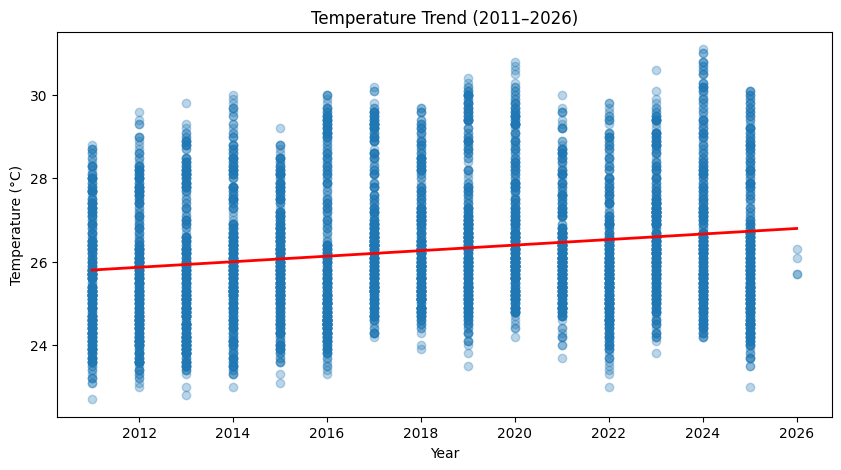

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(data['year'], y, alpha=0.3)
plt.plot(data['year'], model_temp.predict(X), color='red', linewidth=2)
plt.title("Temperature Trend (2011–2026)")
plt.xlabel("Year")
plt.ylabel("Temperature (°C)")
plt.show()


Based on the linear regression model we can see -

 - Annual average increase of **0.07 °C** per year
 - This means a total increase of approxiamtely **1 °C** over 15 years

### Changing Rainfall Trends

Train two Random Forest Regressors of 2011-2016 and 2020-2026 to check the effect of other parameters on precipitation.

In [ ]:
early = data[data['year'] <= 2016]
late = data[data['year'] >= 2020]

In [ ]:
features = [
    'temperature_2m_mean (°C)',
    'shortwave_radiation_sum (MJ/m²)',
    'wind_speed_10m_max (km/h)',
    'pressure_msl_mean (hPa)',
    'cloud_cover_mean (%)'
]

X_e = early[features]
y_e = early['precipitation_sum (mm)']

X_l = late[features]
y_l = late['precipitation_sum (mm)']

X_train_e, X_test_e, y_train_e, y_test_e = train_test_split(X_e, y_e, test_size=0.2)
X_train_l, X_test_l, y_train_l, y_test_l = train_test_split(X_l, y_l, test_size=0.2)


In [ ]:
rf_e = RandomForestRegressor()
rf_e.fit(X_train_e, y_train_e)

rf_l = RandomForestRegressor()
rf_l.fit(X_train_l, y_train_l)

RandomForestRegressor()

In [ ]:
y_pred_e = rf_e.predict(X_test_e)
y_pred_l = rf_l.predict(X_test_l)

rmse_e = np.sqrt(mean_squared_error(y_test_e, y_pred_e))
r2_e = r2_score(y_test_e, y_pred_e)

rmse_l = np.sqrt(mean_squared_error(y_test_l, y_pred_l))
r2_l = r2_score(y_test_l, y_pred_l)

print(f"Early: Rmse={rmse_e}, R2={r2_e}")
print(f"Late: Rmse={rmse_l}, R2={r2_l}")

Early: Rmse=7.414376101218473, R2=0.6993152259735096
Late: Rmse=8.250183319175399, R2=0.8044660252098974


Here we can see from good R2 score on both models that our Random Forest Regressor for both period work well.

However, an increase in RMSE for later period suggest increase in volatility / unpredictability of events in the later stage, which is evidence of climate change.

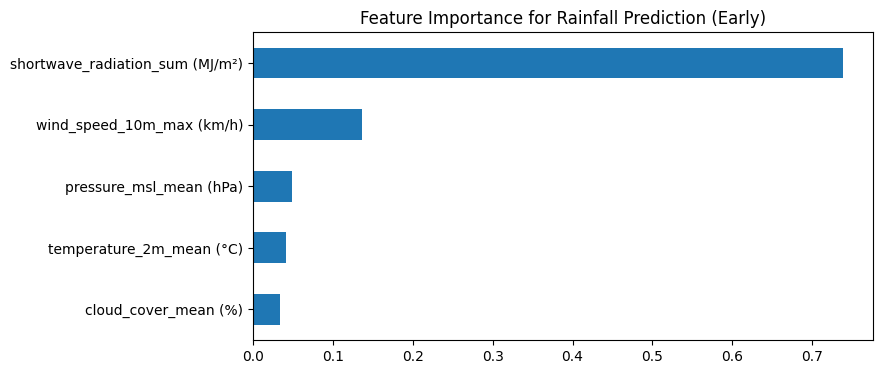

In [ ]:
importances_e = pd.Series(rf_e.feature_importances_, index=features)
importances_e.sort_values().plot(kind='barh', figsize=(8,4))
plt.title("Feature Importance for Rainfall Prediction (Early)")
plt.show()


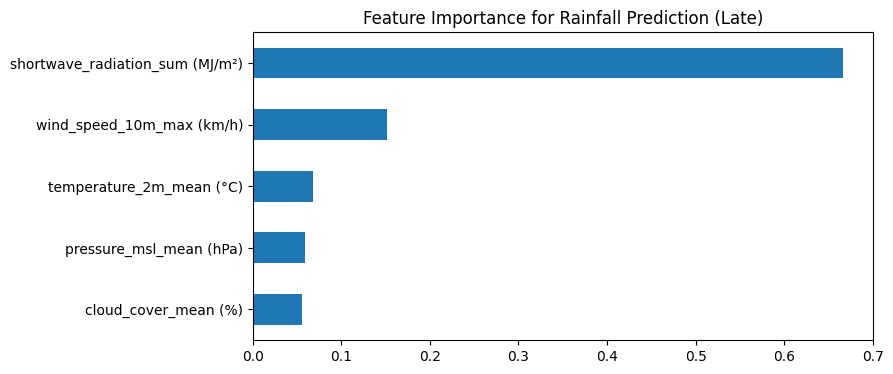

In [ ]:
importances_l = pd.Series(rf_l.feature_importances_, index=features)
importances_l.sort_values().plot(kind='barh', figsize=(8,4))
plt.title("Feature Importance for Rainfall Prediction (Late)")
plt.show()


As we see in features for both time periods, in later one the distribution is slightly less varied, indicating changing / shifting importance of meteorological parameters.

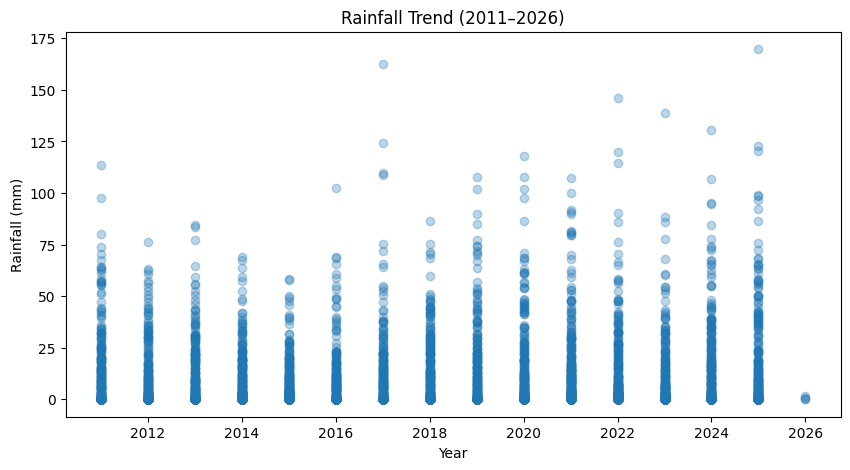

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(data['year'], data['precipitation_sum (mm)'], alpha=0.3)
plt.title("Rainfall Trend (2011–2026)")
plt.xlabel("Year")
plt.ylabel("Rainfall (mm)")
plt.show()

## Conclusion

 1. **Temperature Trend**
  - There is a rise in avergae temperature.
  - The temperature has risen by approximately 1.0 °C from 2011 to 2026
  - Strong evidance of global warming
 2. **Rainfall Pattern**
  - Higher unpredicatbility and randomness in rainfall.
  - Shifting factors affecting rainfall.
 3. **Models Used**
  - Linear Regression (For temperature understanding)
  - Random Forest Regressor (For precipiation comparison)

This indicates effects of climate change on Manipal.